# DOS calculations on Gr.
## Basic energy information and preprocessing for DOS

In [18]:
import pymatgen as mg
# from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen.io.vasp import Poscar
from pymatgen.io.vasp.outputs import Outcar, Oszicar
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Print some info about the DOS run
from pymatgen.io.vasp.inputs import Incar

incar = Incar().from_file("INCAR").get_string()
print('Analytics information:\n{}'.format(incar))

Analytics information:
SYSTEM = C:graphene
ISTART = 0
ISMEAR = -5
SIGMA = 0.01
ENCUT = 800
AMIN = 0.01
NSW = 80
EDIFF = 1e-08
EDIFFG = 1e-07
NEDOS = 9001
ICHARG = 11
IBRION = -1
SYMPREC = 0.0001
NPAR = 6
ADDGRID = True
LREAL = False
LWAVE = False
ALGO = N
NELMIN = 5
PREC = Accurate



In [20]:
# Import some naming stuff from POSCAR
poscar = Poscar.from_file("POSCAR")
formula = poscar.structure.formula

In [21]:
# Get the basic objects
OutFull = Outcar("OUTCAR")
print("Final energy:", OutFull.final_energy)
print("Fermi energy:", OutFull.efermi)
print("Stopped by user:", OutFull.is_stopped)

Final energy: -18.46425308
Fermi energy: -2.725
Stopped by user: False


In [22]:
# Other stuff
OutBasics = Oszicar("OSZICAR")
# print("Complete energy array:\n", OutBasics.all_energies)

In [23]:
energyMatrix = OutBasics.all_energies
indexer = []
for i in range(0, len(energyMatrix)):
    indexer.append(list(range(0, len(energyMatrix[i]))))
    indexer[i] = tuple(indexer[i])
indexer = tuple(indexer)
# Convert everything to tuples so we can pair them with energyMatrix elements in a moment
print(indexer)

((0, 1, 2, 3, 4, 5, 6, 7, 8, 9), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 

(-18.5, -18.4)

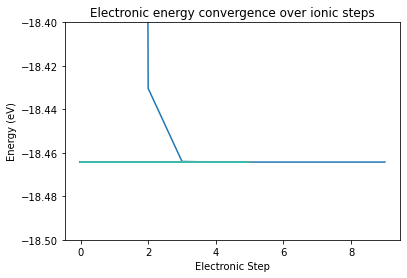

In [24]:
# Plotting
plt.xlabel("Electronic Step")
plt.ylabel("Energy (eV)")
plt.title("Electronic energy convergence over ionic steps")
for i in range(0, len(energyMatrix)):
    plt.plot(indexer[i], energyMatrix[i], label='Step {}'.format(i+1))
# plt.legend()
plt.ylim(-18.5, -18.4)

## DOS

In [25]:
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

# Get the full run daga and extract DOS
run = Vasprun("vasprun.xml")
dos = run.tdos
dos.get_densities()

array([0., 0., 0., ..., 0., 0., 0.])

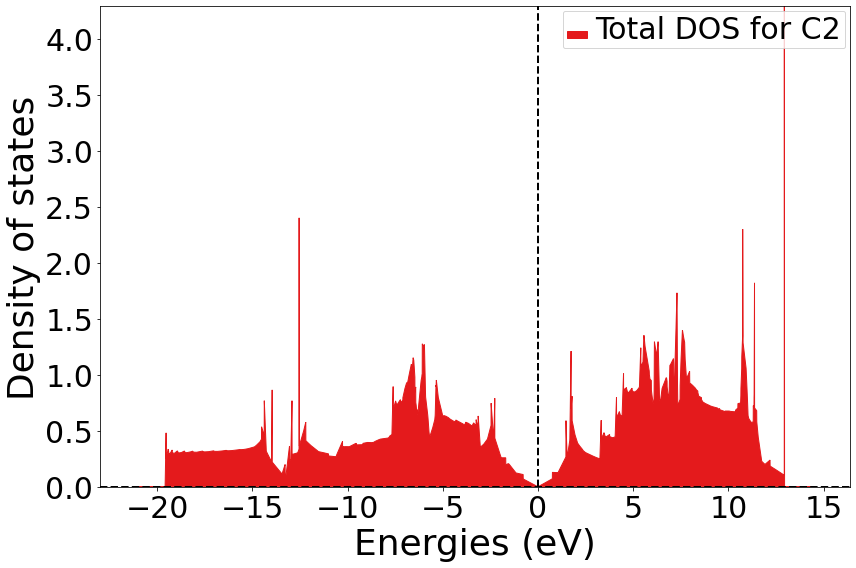

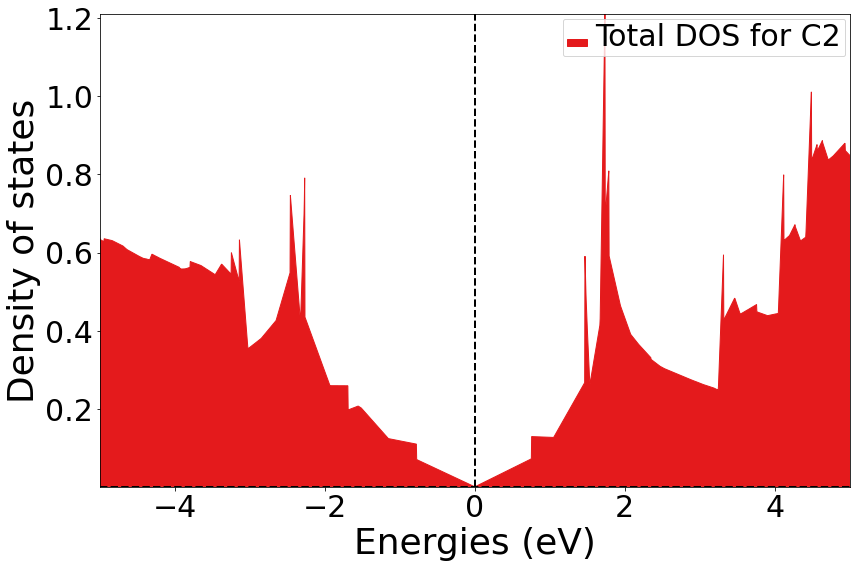

In [26]:
dosplot = DosPlotter(stack=True)
dosplot.add_dos("Total DOS for {}".format(formula), dos)
# f = open('test', 'w')
# f.write(str(dosplot.get_dos_dict()))
# f.close()

dosplot.save_plot("{}_DOS_wide.png".format(formula), "png")
dosplot.save_plot("{}_DOS_narrow.png".format(formula), "png", [-5, 5])